<a href="https://colab.research.google.com/github/Pratheek1027/CODSOFTT/blob/main/Codsoft_task3_Irisflower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **TASK 3 - IRIS FLOWER CLASSIFICATION**

---



IMPORTING THE REQUIRED LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


LOADING THE DATA

In [ ]:
df = pd.read_csv("IRIS.csv")
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


CHECKING FOR THE NULL VALUES

In [ ]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


GRAPH FOR COUNT OF IRIS SPECIES

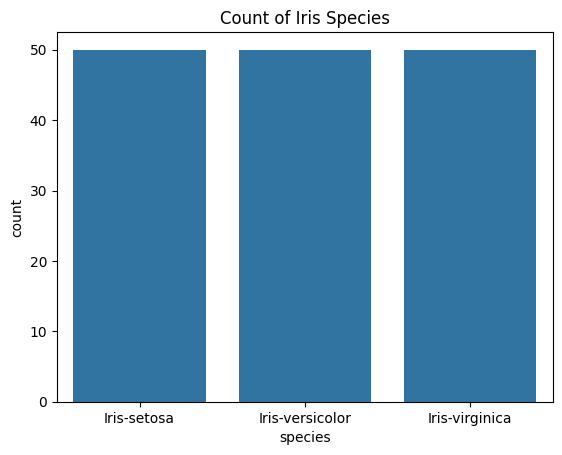

In [ ]:
sns.countplot(x='species', data=df)
plt.title("Count of Iris Species")
plt.show()


GRAPH FOR PETAL LENGTH VS PETAL WIDTH BY IRIS SPECIES

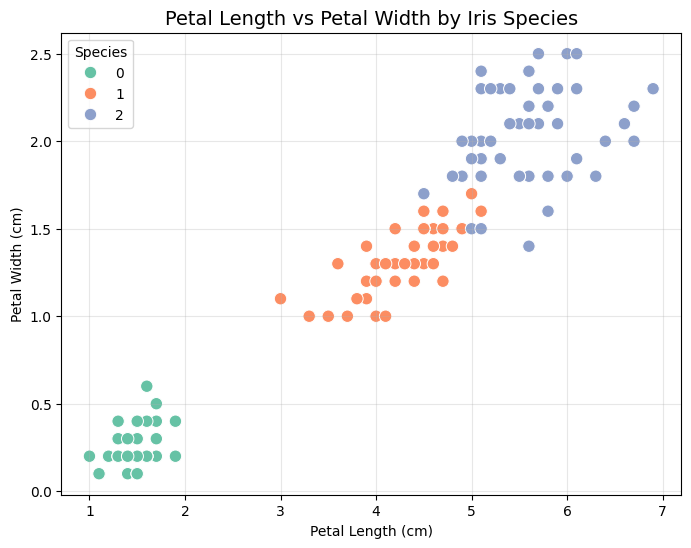

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

sns.scatterplot(
    x='petal_length',
    y='petal_width',
    hue='species',
    data=df,
    palette='Set2',
    s=80
)

plt.title("Petal Length vs Petal Width by Iris Species", fontsize=14)
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend(title="Species")
plt.grid(alpha=0.3)

plt.show()



CONVERTING THE TEXT DATA INTO NUMERIC DATA UNDERSTANDABLE BY THE MODEL

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])


SPECIFYING THE INPUT AND THE OUTPUT

In [ ]:
X = df.drop('species', axis=1)
y = df['species']


TRAIN AND SPLIT

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


BUILDING THE MODEL

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

CHECKING THE ACCURACY USING THE MODEL,THE ACCURACY IS 100%

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



PREDICTING A IRIS SPECIES FOR GIVEN INPUTS

In [ ]:
import pandas as pd


new_sample = pd.DataFrame(
    [[5.1, 3.5, 1.4, 0.2]],
    columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
)

prediction = model.predict(new_sample)

species_map = {
    0: "Iris-setosa",
    1: "Iris-versicolor",
    2: "Iris-virginica"
}

print("Predicted Species:", species_map[prediction[0]])



Predicted Species: Iris-setosa
